In [1]:
import csv
import json
import os
TOTAL_BATCHES = 113


In [2]:
import matplotlib.pyplot as plt

def plot_multiple_lines(x, y_lists, labels=None, title='Line Graph', xlabel='X-axis', ylabel='Y-axis'):
    """
    Plots multiple lines on a graph.

    Parameters:
    - x: List of x-axis values.
    - y_lists: List of lists containing y-axis values for each line.
    - labels: List of labels for each line (default is None).
    - title: Title of the graph (default is 'Line Graph').
    - xlabel: Label for the x-axis (default is 'X-axis').
    - ylabel: Label for the y-axis (default is 'Y-axis').
    """
    for i, y in enumerate(y_lists):
        label = labels[i] if labels else None
        filtered_y = [yi for yi in y if yi >= 0]
        filtered_x = [xj for yi, xj in zip(y, x) if yi >= 0]
        plt.plot(
            filtered_x,
            filtered_y,
            # marker='o',
            label=label
        )
    
    # Adding title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Adding legend if labels are provided
    if labels:
        plt.legend()
    
    # Display the graph
    plt.show()

In [8]:
def load(run_name, title=None):
    data_path = os.path.join('runs', 'detect', run_name, 'bias_13-2_05.jsonl')

    with open(data_path, 'r') as f:
        # headers = next(reader)
        # hd = {name: i for i, name in enumerate(headers)}
        data = []
        for row in f:
            data.append(json.loads(row))

    data.sort(key=lambda row: row['epoch'] + (row['batch']/TOTAL_BATCHES))

    normed_batches = [row['epoch'] + (row['batch']/TOTAL_BATCHES) for row in data]
    print(normed_batches)


    def get_col(col_name):
        return (
            [row['predictions_dist'][col_name]['guess_rate'] for row in data]
            if col_name not in data[0] else
            [row[col_name] for row in data]
        )

    def try_get(row, key, key2):
        return row['predictions_dist'][key][key2] if key in row['predictions_dist'] else 0

    guesses = ['False_Pos', 'True_Pos', 'False_Neg', 'True_Neg']
    print(len([row for row in data if 'plane' in row['predictions_dist']]))
    print(len([row for row in data if 'bird' in row['predictions_dist']]))
    bad_data = [row for row in data if 'plane' not in row['predictions_dist']]
    print(bad_data)
    total_bird = [
        sum([try_get(row, 'bird', x)
             for x in guesses])
        for row in data
    ]
    total_plane = [
        sum([try_get(row, 'plane', x)
             for x in guesses])
        for row in data
    ]
    gr_bird = [try_get(row, 'bird', 'guess_rate') for row in data]
    gr_plane = [try_get(row, 'plane', 'guess_rate') for row in data]
    fp_plane = [(try_get(row, 'plane', 'False_Pos') / total) if total > 0 else -1 for row, total in zip(data, total_plane)]
    fp_bird = [(try_get(row, 'bird', 'False_Pos') / total) if total > 0 else -1 for row, total in zip(data, total_bird)]
    print([(row['epoch'], row['batch']) for row in data])

    plot_multiple_lines(
        normed_batches,
        [
            gr_bird,
            gr_plane,
            # fp_bird,
            # fp_plane,
            get_col('acc')
        ],
        [
            'gr_bird',
            'gr_plane',
            # 'fp_bird',
            # 'fp_plane',
            'acc'
        ],
        title=title or 'guess rate during finetuning',
        xlabel="Epoch",
        ylabel="Classification accuracy"
        )
    return data

[0.0, 0.0, 0.08849557522123894, 0.17699115044247787, 0.26548672566371684, 0.35398230088495575, 0.4424778761061947, 0.5309734513274337, 0.6194690265486725, 0.7079646017699115, 0.7964601769911505, 0.8849557522123894, 0.9734513274336283, 1.0, 1.0, 1.0884955752212389, 1.176991150442478, 1.2654867256637168, 1.3539823008849559, 1.4424778761061947, 1.5309734513274336, 1.6194690265486726, 1.7079646017699115, 1.7964601769911503, 1.8849557522123894, 1.9734513274336283, 2.0, 2.0, 2.088495575221239, 2.1769911504424777, 2.265486725663717, 2.353982300884956, 2.442477876106195, 2.5309734513274336, 2.6194690265486726, 2.7079646017699117, 2.7964601769911503, 2.8849557522123894, 2.9734513274336285, 3.0, 3.0, 3.088495575221239, 3.1769911504424777, 3.265486725663717, 3.353982300884956, 3.442477876106195, 3.5309734513274336, 3.6194690265486726, 3.7079646017699117, 3.7964601769911503, 3.8849557522123894, 3.9734513274336285, 4.0, 4.0, 4.088495575221239, 4.176991150442478, 4.265486725663717, 4.353982300884955

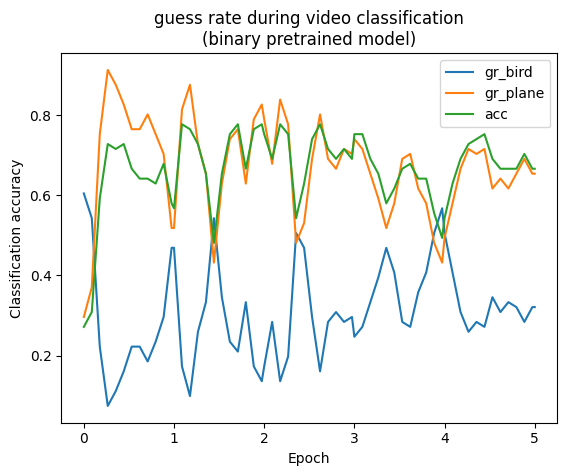

In [9]:
bin_data = load('binary_ft_checkpoints', title='guess rate during video classification\n(binary pretrained model)')

[0.0, 0.08849557522123894, 0.17699115044247787, 0.26548672566371684, 0.35398230088495575, 0.4424778761061947, 0.5309734513274337, 0.6194690265486725, 0.7079646017699115, 0.7964601769911505, 0.8849557522123894, 0.9734513274336283, 1.0, 1.0, 1.0884955752212389, 1.176991150442478, 1.2654867256637168, 1.3539823008849559, 1.4424778761061947, 1.5309734513274336, 1.6194690265486726, 1.7079646017699115, 1.7964601769911503, 1.8849557522123894, 1.9734513274336283, 2.0, 2.0, 2.088495575221239, 2.1769911504424777, 2.265486725663717, 2.353982300884956, 2.442477876106195, 2.5309734513274336, 2.6194690265486726, 2.7079646017699117, 2.7964601769911503, 2.8849557522123894, 2.9734513274336285, 3.0, 3.0, 3.088495575221239, 3.1769911504424777, 3.265486725663717, 3.353982300884956, 3.442477876106195, 3.5309734513274336, 3.6194690265486726, 3.7079646017699117, 3.7964601769911503, 3.8849557522123894, 3.9734513274336285, 4.0, 4.0, 4.088495575221239, 4.176991150442478, 4.265486725663717, 4.353982300884955, 4.4

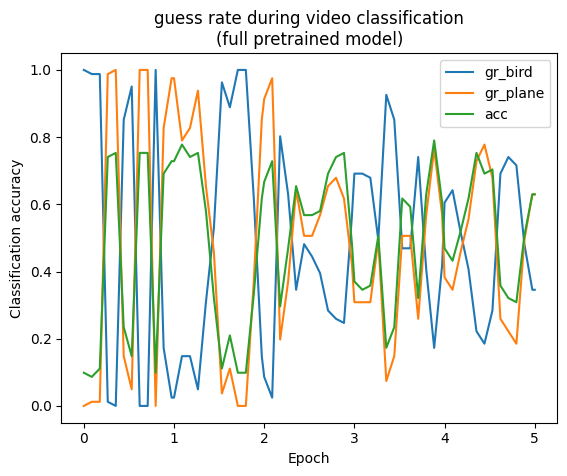

In [10]:
full_data = load('full_ft_checkpoints', title='guess rate during video classification\n(full pretrained model)')


In [56]:
from pprint import pprint

full_data_sorted = sorted(full_data, key= lambda x: x['acc'], reverse=True)
top_full_data = full_data_sorted[:10]

for row in sorted(top_full_data, key=lambda x: x['predictions_dist']['plane']['False_Pos']):
    pprint(row)



{'acc': 0.7530864197530864,
 'batch': 100,
 'epoch': 2,
 'labels_dist': {'None': 12, 'bird': 8, 'plane': 61},
 'predictions_dist': {'None': {'False_Neg': 6,
                               'False_Pos': 5,
                               'True_Neg': 64,
                               'True_Pos': 6,
                               'guess_rate': 0.13580246913580246},
                      'bird': {'False_Neg': 1,
                               'False_Pos': 13,
                               'True_Neg': 60,
                               'True_Pos': 7,
                               'guess_rate': 0.24691358024691357},
                      'plane': {'False_Neg': 13,
                                'False_Pos': 2,
                                'True_Neg': 18,
                                'True_Pos': 48,
                                'guess_rate': 0.6172839506172839}}}
{'acc': 0.7901234567901234,
 'batch': 100,
 'epoch': 3,
 'labels_dist': {'None': 12, 'bird': 8, 'plane': 61},
 'predicti

In [57]:

bin_data_sorted = sorted(bin_data, key= lambda x: x['acc'], reverse=True)
top_bin_data = bin_data_sorted[:10]

for row in sorted(top_bin_data, key=lambda x: x['predictions_dist']['plane']['False_Pos']):
    pprint(row)


{'acc': 0.7777777777777778,
 'batch': 80,
 'epoch': 1,
 'labels_dist': {'None': 12, 'bird': 8, 'plane': 61},
 'predictions_dist': {'None': {'False_Neg': 11,
                               'False_Pos': 1,
                               'True_Neg': 68,
                               'True_Pos': 1,
                               'guess_rate': 0.024691358024691357},
                      'bird': {'False_Neg': 2,
                               'False_Pos': 11,
                               'True_Neg': 62,
                               'True_Pos': 6,
                               'guess_rate': 0.20987654320987653},
                      'plane': {'False_Neg': 5,
                                'False_Pos': 6,
                                'True_Neg': 14,
                                'True_Pos': 56,
                                'guess_rate': 0.7654320987654321}}}
{'acc': 0.7530864197530864,
 'batch': 70,
 'epoch': 1,
 'labels_dist': {'None': 12, 'bird': 8, 'plane': 61},
 'predictio

In [58]:
plot_multiple_lines(
    normed_batches,
    [
        gr_bird,
        gr_plane,
        fp_bird,
        fp_plane,
        get_col('acc')
    ],
    [
        'gr_bird',
        'gr_plane',
        'fp_bird',
        'fp_plane',
        'acc'
    ],
    title='guess rate during video classification',
    xlabel="Epoch",
    ylabel="Classification accuracy"
    )

NameError: name 'normed_batches' is not defined

In [ ]:
!pip show numpy

Name: numpy
Version: 1.26.3
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promo

In [59]:
import numpy as np
import cv2
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

def unnormalize_bbox(w1, h1, x, y, w, h):
    x = x * w1
    w = w * w1
    y = y * h1
    h = h * h1
    return int(x), int(y), int(w), int(h)


def plot_heatmap(map, title):
    plt.imshow(map, cmap='viridis', interpolation='nearest')
    # plt.colorbar()  # Add a colorbar to the heatmap
    plt.title(title)
    plt.show()

def heatmap(dataset: str='datasets/donghyun_dataset_split', split: str='train', cls: str='bird'):
    
    
    imgs_dir = os.path.join(dataset, 'YOLO', 'images', split)
    lbls_dir = os.path.join(dataset, 'YOLO', 'labels', split)

    labels = [os.path.join(lbls_dir, l) for l in os.listdir(lbls_dir) if cls in l]
    images = [os.path.join(imgs_dir, i) for i in os.listdir(imgs_dir) if cls in i]

    im1 = cv2.imread(images[0])
    print(im1.shape)
    w1, h1, _ = im1.shape
    map = np.zeros((w1, h1))

    for label, image in tqdm(zip(labels, images)):
        img = cv2.imread(image)
        if img.shape != im1.shape:
            print(f"BAD BAD BAD! IMAGE OF SHAPE {img.shape} (Expected shape: {im1.shape})")
        with open(label, 'r') as f:
            for line in f:
                if line.strip() == '': pass
                try:
                    vals = line.split()
                except Exception as e:
                    print(label)
                    raise e
                boxes = []
                start = 1
                end = 5
                while end <= len(vals):
                    boxes.append(vals[start:end])
                    start += 4
                    end += 4
                for (x, y, w, h) in boxes:
                    x, y, w, h = unnormalize_bbox(w1, h1, float(x), float(y), float(w), float(h))
                    for i in range(x - int(w / 2), min(x + int(w / 2), w1-1)):
                        for j in range(y -int(h / 2), min(y + int(h / 2), h1-1)):
                            map[i][j] += 1

    plot_heatmap(map, f"heatmap of {cls}")

    return map




(2160, 3840, 3)


350it [00:23, 14.83it/s]


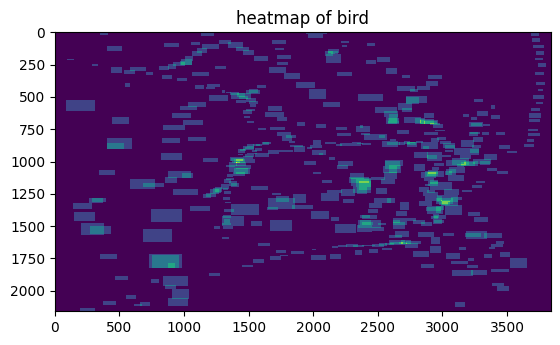

In [60]:
birds_map=heatmap(cls='bird')

(2160, 3840, 3)


2847it [03:38, 13.02it/s]


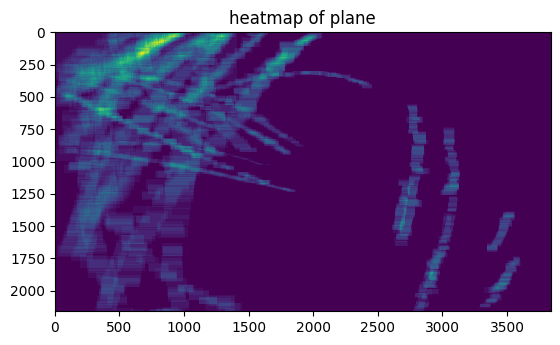

In [61]:
planes_map=heatmap(cls='plane')